<a href="https://colab.research.google.com/github/PEARLClave2002/SalesStat_Pro/blob/main/DATA_ANALYST_PYTHON_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3257421862.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active["VisitDate"] = pd.to_datetime(df_active["VisitDate"])


Pivoted DataFrame:
ClientName  Client A  Client B
VisitDate                     
2024-01-01         1         1
2024-01-02         1         1


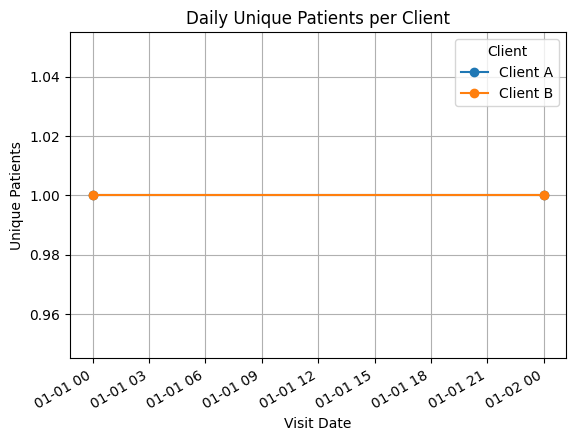

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# The sample datasets
# -----------------------------
visits_data = [
    {"VisitDate": "2024-01-01", "HospitalID": 1, "PatientID": 101},
    {"VisitDate": "2024-01-01", "HospitalID": 2, "PatientID": 201},
    {"VisitDate": "2024-01-02", "HospitalID": 1, "PatientID": 102},
    {"VisitDate": "2024-01-02", "HospitalID": 2, "PatientID": 202},
    {"VisitDate": "2024-01-03", "HospitalID": 1, "PatientID": 103}
]

hospitals_data = [
    {"HospitalID": 1, "HospitalName": "Hospital A", "ClientName": "Client A"},
    {"HospitalID": 2, "HospitalName": "Hospital B", "ClientName": "Client B"}
]

patients_data = [
    {"PatientID": 101, "IsActive": 1},
    {"PatientID": 102, "IsActive": 1},
    {"PatientID": 103, "IsActive": 0},
    {"PatientID": 201, "IsActive": 1},
    {"PatientID": 202, "IsActive": 1}
]

# Convert lists of dicts into DataFrames
df_visits = pd.DataFrame(visits_data)
df_hospitals = pd.DataFrame(hospitals_data)
df_patients = pd.DataFrame(patients_data)

# -----------------------------
# Merging the three DataFrames
# -----------------------------
df_merged = df_visits.merge(df_hospitals, on="HospitalID", how="left")
df_merged = df_merged.merge(df_patients, on="PatientID", how="left")

# -----------------------------
# Filtering only active patients
# -----------------------------
df_active = df_merged[df_merged["IsActive"] == 1]

# -----------------------------
# VisitDate to datetime
# -----------------------------
df_active["VisitDate"] = pd.to_datetime(df_active["VisitDate"])

# -----------------------------
# Unique patients per VisitDate and ClientName
# -----------------------------
df_counts = (
    df_active.groupby(["VisitDate", "ClientName"])["PatientID"]
    .nunique()
    .reset_index(name="UniquePatients")
)

# -----------------------------
# Pivoting so each client is a column
# -----------------------------
df_pivot = df_counts.pivot(index="VisitDate", columns="ClientName", values="UniquePatients").fillna(0)

print("Pivoted DataFrame:")
print(df_pivot)

# -----------------------------
# Line chart
# -----------------------------
df_pivot.plot(kind="line", marker="o")
plt.title("Daily Unique Patients per Client")
plt.xlabel("Visit Date")
plt.ylabel("Unique Patients")
plt.legend(title="Client")
plt.grid(True)
plt.show()
